<a href="https://colab.research.google.com/github/Unstuctional-Prof/STC510/blob/main/Module_3_Basics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import basic modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load crimestat.csv data onto 'crimes' structure.
crimes = pd.read_csv('crimestat.csv',engine='python',on_bad_lines='skip')
    # Obs.: Pandas returned parsing errors, and the problem was the last record of the file.
    # The argument on_bad_lines='skip' simply skipped this record when reading the file.
    # This is not the most elegant solution, but it works for this project.

**Initial checks to verify the data available in the crimestat.csv file.**

In [3]:
crimes.shape   #Check the overal size and shape of 'crimes'.

(131676, 7)

In [4]:
crimes.head()   #Check types of records.

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [5]:
#I did not want to handle spaces in the column names, so they were renamed with an underscore instead.
crimes.rename(columns={"INC NUMBER": "INC_NUMBER", "OCCURRED ON": "OCCURRED_ON", "OCCURRED TO": "OCCURRED_TO", "UCR CRIME CATEGORY": "UCR_CRIME_CATEGORY", "100 BLOCK ADDR": "100_BLOCK_ADDR", "ZIP": "ZIP", "PREMISE TYPE": "PREMISE_TYPE"},inplace=True)

In [6]:
crimes.columns   #Check new column names.

Index(['INC_NUMBER', 'OCCURRED_ON', 'OCCURRED_TO', 'UCR_CRIME_CATEGORY',
       '100_BLOCK_ADDR', 'ZIP', 'PREMISE_TYPE'],
      dtype='object')

In [7]:
crimes.info()   #Check types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC_NUMBER          131676 non-null  object 
 1   OCCURRED_ON         131360 non-null  object 
 2   OCCURRED_TO         93174 non-null   object 
 3   UCR_CRIME_CATEGORY  131676 non-null  object 
 4   100_BLOCK_ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE_TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


**Analyzing categories of crimes by zip code and location types.**

Crime Categories

In [8]:
crimes.UCR_CRIME_CATEGORY.value_counts()   #Check count of each crime category.

LARCENY-THEFT                            66216
BURGLARY                                 23647
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR_CRIME_CATEGORY, dtype: int64

In [9]:
nan_ccateg_values = crimes[crimes['UCR_CRIME_CATEGORY'].isna()]   #Check for 'NaN' values in crime category column.
nan_ccateg_values.UCR_CRIME_CATEGORY   #Display 'NaN' records found.

Series([], Name: UCR_CRIME_CATEGORY, dtype: object)

Location Types

In [10]:
crimes.PREMISE_TYPE.value_counts()   #Check incidence count for each location type.

SINGLE FAMILY HOUSE                    25329
APARTMENT                              14957
PARKING LOT                            14148
STREET / ROADWAY / ALLEY / SIDEWALK    11596
RETAIL BUSINESS                        10852
                                       ...  
FARM FACILITY                              3
GAMBLING FACILITY/CASINO/RACE TRACK        2
LAKE / WATERWAY / BEACH                    1
TRIBAL LANDS                               1
REST AREA                                  1
Name: PREMISE_TYPE, Length: 93, dtype: int64

In [11]:
nan_location_values = crimes[crimes['PREMISE_TYPE'].isna()]   #Check for 'NaN' values in location column.
nan_location_values.PREMISE_TYPE   #Display 'NaN' records found.

120       NaN
214       NaN
314       NaN
325       NaN
340       NaN
         ... 
130540    NaN
130653    NaN
130820    NaN
131436    NaN
131467    NaN
Name: PREMISE_TYPE, Length: 757, dtype: object

ZIP Codes

In [12]:
crimes.ZIP.value_counts()   #Check incidence count for each zip code.

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 98, dtype: int64

In [13]:
nan_zip_values = crimes[crimes['ZIP'].isna()]   #Check for 'NaN' values in ZIP column.
nan_zip_values.ZIP   #Display 'NaN' records found.

63086   NaN
79792   NaN
82369   NaN
Name: ZIP, dtype: float64

In [14]:
crimes.loc[crimes.ZIP.isna(),'ZIP']=0   #Enter value 0 for each 'NaN' ZIP found.

In [15]:
crimes.ZIP.value_counts()   #Re-check incidence count for each zip code after removal of 'NaN values.

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 99, dtype: int64

In [16]:
nzip = crimes.groupby('ZIP')   #Group records by ZIP codes.

In [17]:
nzip.size()   #Another check for incidence count by ZIP codes - sorted ascendently.

ZIP
0.0           3
85003.0    1513
85004.0    1650
85006.0    2661
85007.0    2000
           ... 
85382.0       2
85383.0       2
85392.0       8
85395.0       2
85396.0       4
Length: 99, dtype: int64

In [18]:
nzip_output = nzip.UCR_CRIME_CATEGORY.value_counts()   #Count crime categories for each ZIP code and store results in 'nzip_output'.
nzip_output

ZIP      UCR_CRIME_CATEGORY 
0.0      LARCENY-THEFT            2
         RAPE                     1
85003.0  LARCENY-THEFT          758
         DRUG OFFENSE           194
         BURGLARY               179
                               ... 
85395.0  AGGRAVATED ASSAULT       1
         RAPE                     1
85396.0  LARCENY-THEFT            2
         BURGLARY                 1
         MOTOR VEHICLE THEFT      1
Name: UCR_CRIME_CATEGORY, Length: 563, dtype: int64

In [19]:
nzip_output.to_csv('nzip_output.csv')   #Export results to csv file.
    #Obs.: I was not able to find another way to access only the count values (without the whole record).
    #The solution I found was to export everything, and they reload as a separate dataframe.

In [20]:
zip_cat = pd.read_csv('nzip_output.csv')   #Load 'nzip_output.csv' onto zip_cat.

In [21]:
zip_cat.head()

,ZIP,UCR_CRIME_CATEGORY,UCR_CRIME_CATEGORY.1
0,0.0,LARCENY-THEFT,2
1,0.0,RAPE,1
2,85003.0,LARCENY-THEFT,758
3,85003.0,DRUG OFFENSE,194
4,85003.0,BURGLARY,179


In [22]:
#Rename count column.
zip_cat.rename(columns={"ZIP": "ZIP", "UCR_CRIME_CATEGORY": "UCR_CRIME_CATEGORY", "UCR_CRIME_CATEGORY.1": "CATEGORY_COUNT"},inplace=True)

In [23]:
zip_cat.columns

Index(['ZIP', 'UCR_CRIME_CATEGORY', 'CATEGORY_COUNT'], dtype='object')

In [24]:
ncat = crimes.groupby('UCR_CRIME_CATEGORY')   #Group records by crime category.

In [25]:
ncat.size()   #Count incidences by crime categories.

UCR_CRIME_CATEGORY
AGGRAVATED ASSAULT                        9306
ARSON                                      634
BURGLARY                                 23647
DRUG OFFENSE                              9572
LARCENY-THEFT                            66216
MOTOR VEHICLE THEFT                      14391
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
RAPE                                      1981
ROBBERY                                   5640
dtype: int64

In [26]:
ncat_output = ncat.ZIP.value_counts()   #Count ZIP codes for each crime category and store results in 'ncat_output'.
ncat_output.to_csv('ncat_output.csv')   #Export results to csv file.
ncat_output

UCR_CRIME_CATEGORY  ZIP    
AGGRAVATED ASSAULT  85008.0    516
                    85009.0    482
                    85015.0    476
                    85017.0    476
                    85041.0    429
                              ... 
ROBBERY             85301.0      1
                    85303.0      1
                    85331.0      1
                    85337.0      1
                    85345.0      1
Name: ZIP, Length: 563, dtype: int64

In [27]:
cat_zip = pd.read_csv('ncat_output.csv')   #Load 'ncat_output.csv' onto cat_zip.

In [28]:
cat_zip.head()

,UCR_CRIME_CATEGORY,ZIP,ZIP.1
0,AGGRAVATED ASSAULT,85008.0,516
1,AGGRAVATED ASSAULT,85009.0,482
2,AGGRAVATED ASSAULT,85015.0,476
3,AGGRAVATED ASSAULT,85017.0,476
4,AGGRAVATED ASSAULT,85041.0,429


In [29]:
#Rename count column.
cat_zip.rename(columns={"UCR_CRIME_CATEGORY": "UCR_CRIME_CATEGORY", "ZIP": "ZIP", "ZIP.1": "ZIP_COUNT"},inplace=True)

In [30]:
cat_zip.columns   #Verify the renamed columns.

Index(['UCR_CRIME_CATEGORY', 'ZIP', 'ZIP_COUNT'], dtype='object')

In [31]:
crimes.ZIP.nunique()   #Count unique values of ZIP codes.

99

For the purpose of this assignment, I will assume that adjacent ZIP codes in the list of unique ZIP codes belong to a same Phoenix region (this is a fictictious and arbitrary division). This will then be mapped according to the following 5 regions:

*   Non-determined: [0] : (0)
*   Central: [1 - 20] : (85003-85027)
*   NW: [21 - 40] : (85028-85083)
*   NE: [41 - 60] : (85085-85254)
*   SW: [61 - 80] : (85255-85307)
*   SE: [81 - 98] : (85308-85396)

In [32]:
#Initialize table with crimes by region (according to grouping of ZIP codes).
crimes_by_region = [['Crime','Central','Northwest','Northeast','Southwest','Southeast'],
                    ['AGGRAVATED ASSAULT',0,0,0,0,0],
                    ['ARSON',0,0,0,0,0],
                    ['BURGLARY',0,0,0,0,0],
                    ['DRUG OFFENSE',0,0,0,0,0],
                    ['LARCENY-THEFT',0,0,0,0,0],
                    ['MOTOR VEHICLE THEFT',0,0,0,0,0],
                    ['MURDER AND NON-NEGLIGENT MANSLAUGHTER',0,0,0,0,0],
                    ['RAPE',0,0,0,0,0],
                    ['ROBBERY',0,0,0,0,0]]

In [33]:
cat_zip_unique = cat_zip.UCR_CRIME_CATEGORY.unique()   #Create a list of unique crime categories
cat_zip_unique

array(['AGGRAVATED ASSAULT', 'ARSON', 'BURGLARY', 'DRUG OFFENSE',
       'LARCENY-THEFT', 'MOTOR VEHICLE THEFT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'RAPE', 'ROBBERY'],
      dtype=object)

In [34]:
# This section populates the table 'crimes_by_region' with the count of incidences for each one of the five predefined regions of Phoenix
# according to the arbitrary grouping of ZIP codes.
for r in range(len(cat_zip_unique)):
  crime_cats = cat_zip[cat_zip.UCR_CRIME_CATEGORY==cat_zip_unique[r]]
  calc_cats = crime_cats
  calc_cats.index = pd.RangeIndex(len(calc_cats.index))
  for i in range(len(calc_cats)):
    if calc_cats.ZIP[i]>=85003 and calc_cats.ZIP[i]<=85027:
      crimes_by_region[r+1][1] += calc_cats.ZIP_COUNT[i]
    elif calc_cats.ZIP[i]>=85028 and calc_cats.ZIP[i]<=85083:
      crimes_by_region[r+1][2] += calc_cats.ZIP_COUNT[i]
    elif calc_cats.ZIP[i]>=85085 and calc_cats.ZIP[i]<=85254:
      crimes_by_region[r+1][3] += calc_cats.ZIP_COUNT[i]
    elif calc_cats.ZIP[i]>=85255 and calc_cats.ZIP[i]<=85307:
      crimes_by_region[r+1][4] += calc_cats.ZIP_COUNT[i]
    elif calc_cats.ZIP[i]>=85308 and calc_cats.ZIP[i]<=85396:
      crimes_by_region[r+1][5] += calc_cats.ZIP_COUNT[i]

In [35]:
for r in range(len(cat_zip_unique)):
  print (crimes_by_region[r], '\n')   #Check if table was populated correctly.

['Crime', 'Central', 'Northwest', 'Northeast', 'Southwest', 'Southeast'] 

['AGGRAVATED ASSAULT', 4749, 4010, 108, 61, 378] 

['ARSON', 323, 281, 8, 4, 18] 

['BURGLARY', 11085, 10622, 471, 222, 1247] 

['DRUG OFFENSE', 5635, 3586, 103, 75, 173] 

['LARCENY-THEFT', 33169, 27616, 1979, 598, 2852] 

['MOTOR VEHICLE THEFT', 6731, 6725, 161, 111, 663] 

['MURDER AND NON-NEGLIGENT MANSLAUGHTER', 143, 125, 0, 5, 16] 

['RAPE', 1059, 768, 47, 27, 79] 



In [36]:
df = pd.DataFrame(crimes_by_region,columns=crimes_by_region[0])   #Convert table (list) to dataframe.

In [37]:
df

,Crime,Central,Northwest,Northeast,Southwest,Southeast
0,Crime,Central,Northwest,Northeast,Southwest,Southeast
1,AGGRAVATED ASSAULT,4749,4010,108,61,378
2,ARSON,323,281,8,4,18
3,BURGLARY,11085,10622,471,222,1247
4,DRUG OFFENSE,5635,3586,103,75,173
5,LARCENY-THEFT,33169,27616,1979,598,2852
6,MOTOR VEHICLE THEFT,6731,6725,161,111,663
7,MURDER AND NON-NEGLIGENT MANSLAUGHTER,143,125,0,5,16
8,RAPE,1059,768,47,27,79
9,ROBBERY,2954,2428,42,24,192


In [38]:
df = df.drop(labels=0, axis=0)   #Remove first row as it is already repeated on the header.

In [39]:
df

,Crime,Central,Northwest,Northeast,Southwest,Southeast
1,AGGRAVATED ASSAULT,4749,4010,108,61,378
2,ARSON,323,281,8,4,18
3,BURGLARY,11085,10622,471,222,1247
4,DRUG OFFENSE,5635,3586,103,75,173
5,LARCENY-THEFT,33169,27616,1979,598,2852
6,MOTOR VEHICLE THEFT,6731,6725,161,111,663
7,MURDER AND NON-NEGLIGENT MANSLAUGHTER,143,125,0,5,16
8,RAPE,1059,768,47,27,79
9,ROBBERY,2954,2428,42,24,192


In [48]:
asd = df.sort_values(by=['Central'],ascending=False)   #Sort dataframe values according to 'Centra' column.

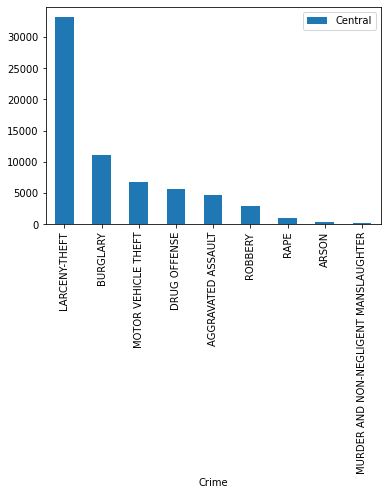

In [49]:
asd.plot.bar(x=0,y=1)   #Plot only 'Central' values in descending order.